# Firstly, we need to check how much images each class has.

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
data_train_path = "data/simpsons_dataset_copy"
bs = 256

In [3]:
characters = os.listdir(data_train_path)
image_counts = []

for character in characters:
    folder_path = os.path.join(data_train_path, character)
    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        image_counts.append(len(images))

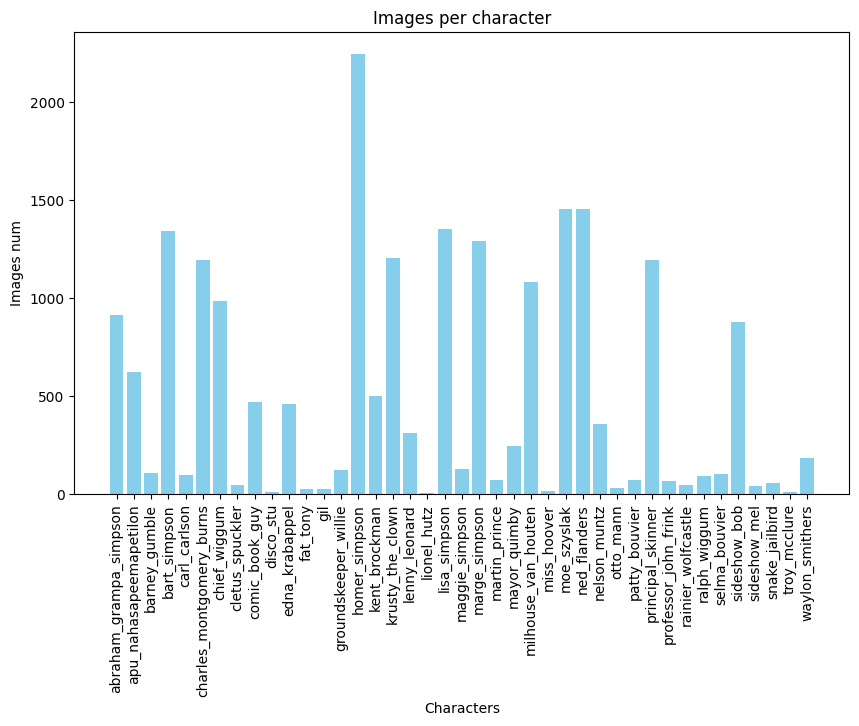

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(characters, image_counts, color='skyblue')
plt.xlabel('Characters')
plt.ylabel('Images num')
plt.title('Images per character')
plt.xticks(rotation=90)
plt.show()

# As we can see, some classes has not enough images, let's correct it by augmentation:

In [5]:
def augment_image(image, path):
    """
    Takes an image and its path as input, and performs various image augmentation techniques to generate multiple augmented images.
    """
    image_name = '.'.join(os.path.basename(path).split('.')[:-1])
    # print(image_name)
    image_folder = os.path.dirname(path)

    # Reflection relative to the vertical axis
    reflected_image = cv2.flip(image, 1)
    cv2.imwrite(os.path.join(image_folder, f'{image_name}-reflected.jpg'), reflected_image)

    # Rotation from -25 to 25 degrees in 5 degree increments
    for angle in range(-25, 30, 5):
        if angle != 0:
            M = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
            rotated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
            cv2.imwrite(os.path.join(image_folder, f'{image_name}-rotated_{angle}.jpg'), rotated_image)

    # Adding a noise
    for i in range(3):
        noise = np.random.normal(0, np.random.randint(10, 20), image.shape).astype(np.uint8)
        noisy_image = cv2.add(image, noise)
        cv2.imwrite(os.path.join(image_folder, f'{image_name}-noisy-{i}.jpg'), noisy_image)

    # Brightness change from 10 to 50 in 5 steps increments
    for brightness in range(10, 31, 5):
        brightness_image = np.where((255 - image) < brightness, 255, image + brightness)
        cv2.imwrite(os.path.join(image_folder, f'{image_name}-brightness-{brightness}.jpg'), brightness_image)

    # Scaling from 0.5 to 1.5
    for scale in np.arange(0.8, 1.3, 0.1):
        if scale != 1:
            scaled_image = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
            cv2.imwrite(os.path.join(image_folder, f'{image_name}-scaled-{scale}.jpg'), scaled_image)

In [6]:
num_images_threshold = 500

for folder in os.listdir(data_train_path):
    folder_path = os.path.join(data_train_path, folder)
    images = os.listdir(folder_path)
    if len(images) < num_images_threshold:
        start_len = len(images)
        i = 0
        while start_len < num_images_threshold and i < len(images):
            image_path = os.path.join(folder_path, images[i])
            augment_image(cv2.imread(image_path), image_path)
            start_len += 23
            i += 1

# Now we had got some augmented images, let's count the number of them:

In [7]:
image_counts = []

for character in characters:
    folder_path = os.path.join(data_train_path, character)
    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        image_counts.append(len(images))

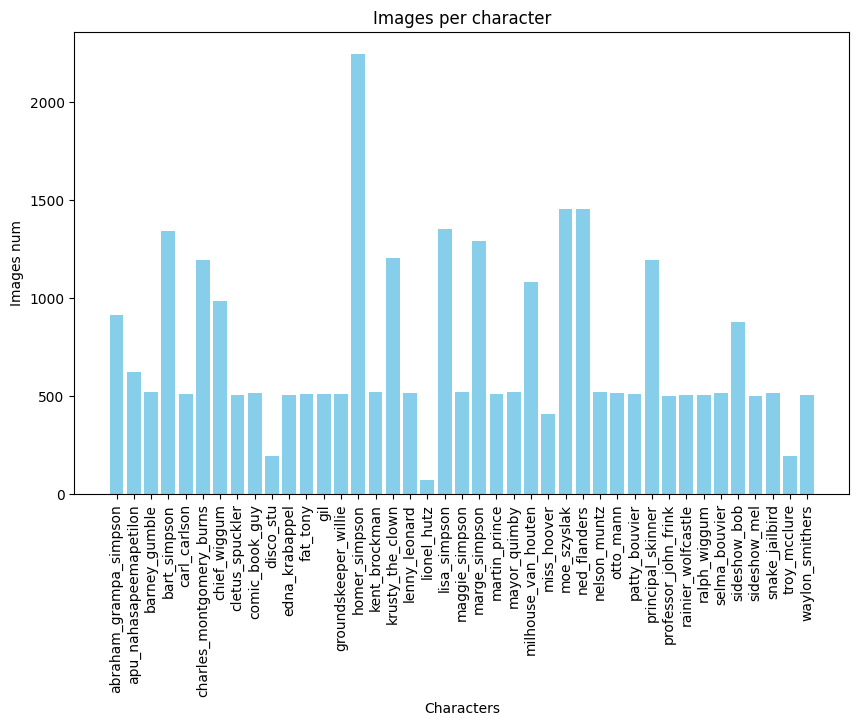

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(characters, image_counts, color='skyblue')
plt.xlabel('Characters')
plt.ylabel('Images num')
plt.title('Images per character')
plt.xticks(rotation=90)
plt.show()

# So, it will be more convenient to work with